# Programming for Data Analytics #

## Project 1 ##

***

**Project Objectives**

This project is to selct a real world phenomenon and synthesise and model data relating to the selected phenomenon. Key considerations

- Use numpy.random to synthesise data
- Phenomenon must be measurable with potential to collect 100 data points across 4 variables,
- Simulate data set matching the dataset as closely as possible
- Detail project research.


**Selected Phenomenon**

The phenomenon that I have selected to analyse in this project is the level of engagement received by DMO the number of likes received by tweets, specifically the relationship between the primamry determinants of likes per Tweet and the tweet like numbers.




##  Project approach ##

The project approach I have adopted to complete this project follows the below broad steps. Each step is furhter expanded throughout this Jupyter notebook:

1. Identify Phenomenon,
2. Source real data set,
3. Prepare real data set for analysis,
4. Analyse real data set for distribution and relationships,
5. Synthesise/simulate data sets

### Phenomenon Research ###

Infomration pertaining to tweet performance with regard to number of likes is readily available. A data set, detailing tweet performmance and content is published on kaggle. 
Based on further research, the variables that effect twitter engagement, the nominated engagement variable for this project is likes, include a number of factors such as language of tweet, the inclusion of media (photos, videos, links etc.), day/time of tweet, number of account followers. 

The most interesting variables that influence tweet engagement or like count are:
1. the day of the week of the tweet, 
2. the number of followers the account has, 
3. the inclusion of a photo or video, 
4. the length of the tweet (characters)

### Data Set ###

A real world data set was idnetified and downloaded from Kaggle for the purpose of this project. The data set is publically available from Kaggle with a CC0: Public DOmain licence. The description of the data set (available from Kaggle) is:

*The dataset consists of 21677 tweets posted from 25th March 2019 to 31st January 2022 by 23 Destination marketing organizations (DMO). The tweets were collected to study the social media content strategy of DMOs. Specifically, the research attempted to study how the linguistic features in social media content strategies of DMOs change during the pre-Covid, lockdown, and post-lockdown phases and their impact on social media user engagement. Accordingly, the data constitutes key variables like confidence and positive engagement expressed in a tweet, the amount of cognitive content embedded in a tweet, the media type, the number of hashtags, mentions, and word count of a tweet. The number of likes and retweets associated with each tweet is also captured. The dataset also captures each tweet's date and time stamp to classify it into three phases: pre-COVID, during lockdown, and post-COVID. The timelines are chosen per the Government of India's declaration of the lockdown.*


## Libraries ##

Here is where I load in the required libraries for completing the project

In [1]:
#import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions


## Prepare Real Data set for Analysis ##

First I want to read in all of the real world data from the csv file that I downloaded from kaggle and stored in the data forlder in the project directory. I only import the fields/columns that I may be intereted in as the file contains a broad range of data columns that relate to each tweet but will not be used in this project. initially, the fields that I am importing include:

- Like Count,
- the Day the tweet was published,
- The time of the tweet,
- The number of followers the page that published the tweet has,
- The status text - the actual tweet content or status
- Media type attached to the tweet 

This then allows me to print the data to the screen to ensure the data selected is the relevant data. 

In [2]:
# read in data from the csv file in the data folder
tweet = pd.read_csv('data/Data LIWC 01 02 23.csv', usecols = ['State', 'like_count', 'Clout', 'DateDay', 'Time', 'Followers', 'Status text', 'Vividness' ]) # import relevant data from CSV file
#print (tweet) #Print the data to the screen to conirm the correct data was imported

Next we want to make a number of amendments to the data set in order to facilitate better analysis. The following changes/amendments to the data set are initially proposed in order to standardise and convert recorded data to numerical values.

Newly created values, based on the original values will be appended to the exisitng tweet data frame and saved as a new data frame called tweet2.

 - State => This is a text field describing the state in which the DMO is located/promoting. No transformation will be carried out on this variable
 - Like Count => This is an integar value that can be any value including zero. No transformation will be carried out on this value.
 - Clout => This is a float value that represents the influnce level of the tweet. No transformation will be carried out on this value.
 - DateDay => this is a text value listing the day of the week that the tweet was published. This will be transformed to a numberical value from 0 - 6, with Monday being 0 and Sunday being 6.
 - Time => this is a text valie listing if the tweet was published during business hours or Non-Business hours. Non-business hours will be 0 and Business hours will be 1.
 - Followers => This is an integar value that can be any value including zero. No transformation will be carried out on this value.
 - Status text => this is a text value listing the text content of the relevant tweet. This will be converted to a numerical value counting the length of the tweet in characters.
 - Vividness => this is a text value detailing the media form that is attached to each tweet. This will be converted to a numerical value where 0 represents photos and 1 represents video. 

 

In [3]:
tweet["NewDay"] = "" #create a new column in the data frame
#print (tweet) # print to confirm the creation of the new column
#Update the value of DateDay to be a integar value from 0 - 6 based on the day of the week
tweet.loc[tweet['DateDay']=="Monday",['NewDay']]=0
tweet.loc[tweet['DateDay']=="Tuesday",['NewDay']]=1
tweet.loc[tweet['DateDay']=="Wednesday",['NewDay']]=2
tweet.loc[tweet['DateDay']=="Thursday",['NewDay']]=3
tweet.loc[tweet['DateDay']=="Friday",['NewDay']]=4
tweet.loc[tweet['DateDay']=="Saturday",['NewDay']]=5
tweet.loc[tweet['DateDay']=="Sunday",['NewDay']]=6
#print (tweet) # print to confirm the creation of new integer values in the column NewDay

In [4]:
tweet["TweetTime"] = "" #create a new column in the data frame
#print (tweet) # print to confirm the creation of the new column
#Update the value of Time to be a integar value of 0 or 1 depending if the tweet was published buring busiess or non-business hours
tweet.loc[tweet['Time']=="Non-buisness hours",['TweetTime']]=0 # Note there is a spelling error in the CSV file that has been accounted for here in the transformation
tweet.loc[tweet['Time']=="Business hours",['TweetTime']]=1
#print (tweet) # print to confirm the creation of new integer values in the column TweetTime

In [5]:
tweet["TweetLen"] = tweet["Status text"].str.len() #create a new column in the data frame to represent the length of the tweet
#print (tweet) # print to confirm the creation of the new column complete with lenght of the tweet

#Refernce for implementation: https://stackoverflow.com/questions/42815768/pandas-adding-column-with-the-length-of-other-column-as-value

In [6]:
tweet["Media"] = "" #create a new column in the data frame to represent the presence of media in the tweet
#print (tweet) # print to confirm the creation of the new column
#Update the value of Time to be a integar value of 0, 1 or 2 depending if the tweet was published with a photo,a video or text
tweet.loc[tweet['Vividness']=="photo",['Media']]=0
tweet.loc[tweet['Vividness']=="video",['Media']]=1
tweet.loc[tweet['Vividness']=="text",['Media']]=2
#print (tweet) # print to confirm the creation of new integer values in the column Media

In [7]:
#Now, I am creating a new data frame with just the fields that I want to include in my analysis. This includes the fields that the above transformations have been carried out upon.

df = tweet[['State', 'like_count', 'Clout', 'NewDay', 'Followers', 'TweetLen', 'Media']]
print(df)

#reference for implementation: https://sparkbyexamples.com/pandas/pandas-create-new-dataframe-by-selecting-specific-columns/?expand_article=1

       State  like_count  Clout NewDay  Followers  TweetLen Media
0      Assam           1  40.06      2       5164       192     0
1      Assam           1  40.06      3       5164       257     0
2      Assam           1  40.06      6       5164       226     0
3      Assam           3  90.60      0       5164       264     0
4      Assam           1  57.11      1       5164       211     0
...      ...         ...    ...    ...        ...       ...   ...
23001  Assam          14  98.75      4       5164        83     0
23002  Assam          38  72.07      4       5164       309     0
23003  Assam          33  40.06      6       5164       310     0
23004  Assam          15  91.33      6       5164       178     0
23005  Assam          16  89.50      1       5164       159     1

[23006 rows x 7 columns]


## Real Data Analysis ##

Now that we have the real data transformed and stored in the data frame df, we can start analysing the values that are in the data frame. The objective here is to dive deeper into the data in order to fully understand the variable features in order to facilitate the synthesis of data to closely reflect the real data. 



c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

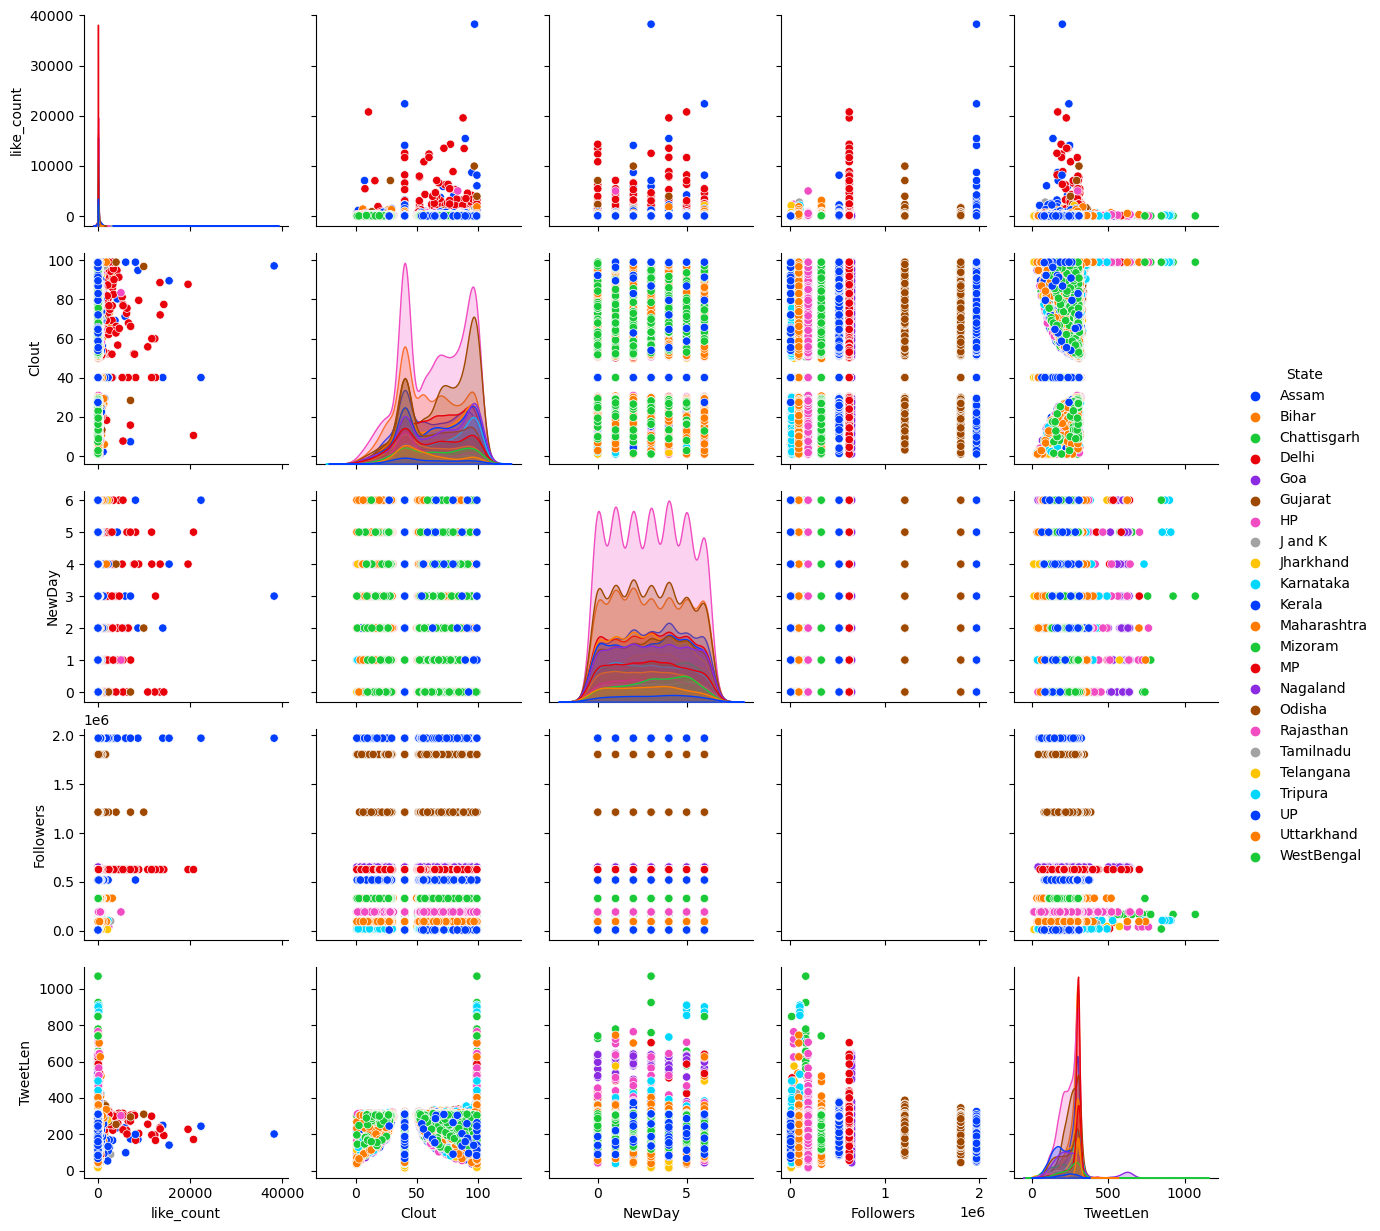

In [8]:
sns.pairplot(df, hue="State", palette="bright")

The above pair plot illustrates the relationship between each of the data points, I have applied filtering by region ot further illustrate the variances and relationships by location. While not a key variable for this analysis it is interesting to observe the variances by region. 

The next step in my analysis will look at the distribtuions of each of the variables

c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

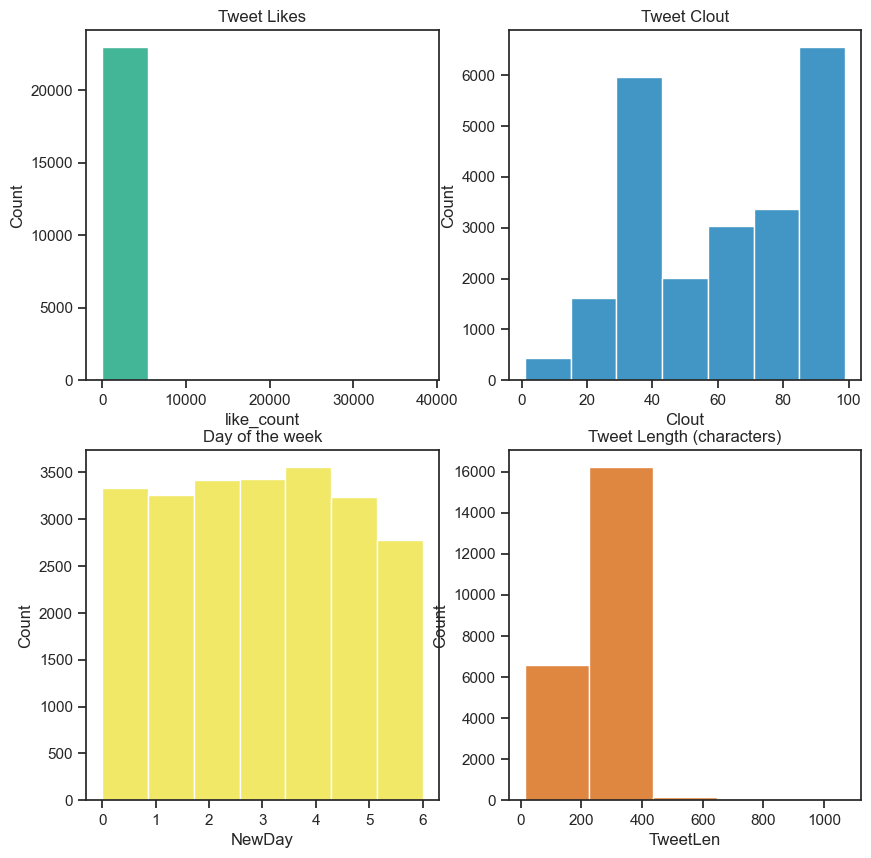

In [9]:
#create sub plots to represent multiple variables. This will demonstrate the distribution of each of the relevant variables 
sns.set(style = "ticks", palette="colorblind")
f,axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].set_title("Tweet Likes")
sns.histplot(df['like_count'], ax=axes[0,0], bins=7, color="g");
axes[0,1].set_title("Tweet Clout")
sns.histplot(df['Clout'], ax=axes[0,1], bins=7, color="b");
axes[1,0].set_title("Day of the week")
sns.histplot(df['NewDay'], ax=axes[1,0], bins=7, color="y");
axes[1,1].set_title("Tweet Length (characters)")
sns.histplot(df['TweetLen'], ax=axes[1,1], bins=5, color="r");

Further analysis will be conducted on each variable individually in the subsequent sections. Initial impressions of the Like count indicate that outliers may be affecting the distribution of the data. This will be investigated individually later in the workbook. Similarly, Tweet Length appears to be affected by outliers also.

### Distribution of data by State ###

We will use the numpy library to analyse the data further, calculating the mean and standard deviation of the data by state within the dataset.
While this is not essential to the project, it is interested to see how tweets perform geographically. 



In [10]:
#Create a table that summarises each of the variables to demonstrate the average and the standard deviation of the tweet information by state. I have rounded the results to 2 decimal places in order to imrove the appearance and readability of the table.

df.groupby(["State"]).mean("like_count").round(2).sort_values(by='like_count', ascending=False)



,like_count,Clout,Followers,TweetLen
State,,,,
MP,495.44,65.35,625186.0,294.19
Kerala,452.66,65.70,1972674.0,203.94
Bihar,206.57,56.76,81503.0,295.63
Maharashtra,204.47,65.17,331116.0,261.15
Gujarat,186.47,57.61,1805768.0,228.98
J and K,170.79,53.32,96691.0,227.29
Karnataka,149.32,73.84,102662.0,288.35
UP,141.93,61.31,517867.0,269.20
Jharkhand,99.97,58.62,40816.0,261.62


The following shows a the standard deviation of the variables by state.

In [11]:
df.groupby(["State"]).std(numeric_only=True).round(2).sort_values(by='like_count', ascending=False)


,like_count,Clout,Followers,TweetLen
State,,,,
MP,1480.05,24.01,0.0,36.46
Kerala,1458.10,25.57,0.0,66.19
Maharashtra,296.91,25.62,0.0,59.29
Odisha,284.78,25.01,0.0,49.15
UP,247.36,24.43,0.0,46.93
J and K,214.72,22.69,0.0,70.91
Karnataka,170.59,23.00,0.0,70.26
Gujarat,147.47,24.53,0.0,68.10
HP,140.92,23.35,0.0,93.36


In [12]:
df.std(numeric_only=True)

like_count       537.268359
Clout             25.410441
Followers     596031.456792
TweetLen          70.468010
dtype: float64

In [13]:
df.describe().round(2)

,like_count,Clout,Followers,TweetLen
count,23006.00,23006.00,23006.00,23006.00
mean,139.50,63.85,508226.52,254.49
std,537.27,25.41,596031.46,70.47
min,0.00,1.00,5164.00,14.00
25%,27.00,40.06,91325.00,215.00
50%,63.00,65.16,190197.00,275.00
75%,137.00,88.15,650771.00,302.00
max,38244.00,99.00,1972674.00,1070.00


### Variable Relationships ###

The covariance and correlation between varaibles is used to determine if a linear relationship exists. Covaraince is used to measure joint variability of two variable. 

A perfect correlation will have a correlation coefficienct of 1 with variables having no correlation will have a correlation coefficient of 0. 

In [14]:
#below is a table displaying the covariance of the variables in the dataset

df.cov(numeric_only=True).round(2)


,like_count,Clout,Followers,TweetLen
like_count,288657.29,75.32,4.026840e+07,-589.12
Clout,75.32,645.69,4.874949e+05,186.28
Followers,40268395.10,487494.90,3.552535e+11,-4873675.29
TweetLen,-589.12,186.28,-4.873675e+06,4965.74


In [15]:
#below is a table displaying the correlation of the variables in the dataset

df.corr(numeric_only=True)

,like_count,Clout,Followers,TweetLen
like_count,1.000000,0.005517,0.125749,-0.015560
Clout,0.005517,1.000000,0.032188,0.104028
Followers,0.125749,0.032188,1.000000,-0.116037
TweetLen,-0.015560,0.104028,-0.116037,1.000000


The correlation betweent he nominated values is not significant in any of the above variables. The variables with the highest correlation is the number of followes and the number of likes a post received. I was expecting a far more significance between Like coutn, followers and Tween Length. I was not sure of the relationship between clout an likes prior to this analysis.

In [16]:
df.columns

Index(['State', 'like_count', 'Clout', 'NewDay', 'Followers', 'TweetLen',
       'Media'],
      dtype='object')

Now we will creat regression plots in order to visualise the relationships.

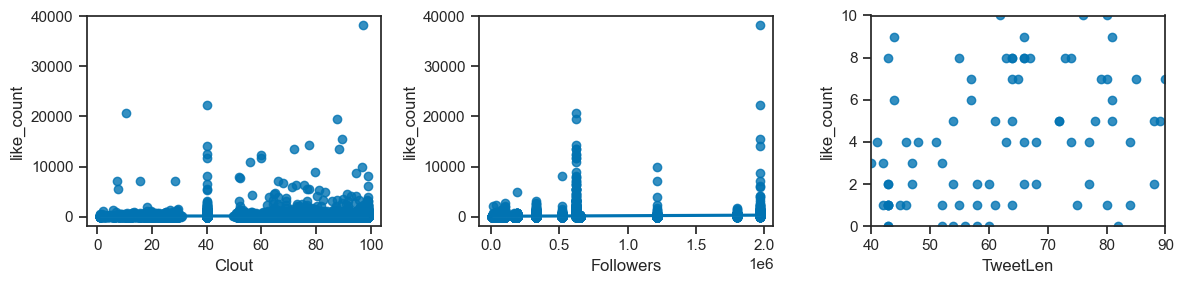

In [17]:
#laying out charts for have 3 graphs
f,axes=plt.subplots(1,3, figsize=(12,3))

sns.regplot(y = "like_count", x = "Clout", data = df, ax=axes[0])
sns.regplot(y = "like_count", x = "Followers", data = df, ax=axes[1])
sns.regplot(y = "like_count", x = "TweetLen", data = df, ax=axes[2])

axes[2].set_ylim(0,10); axes[2].set_xlim(40,90)
plt.tight_layout()

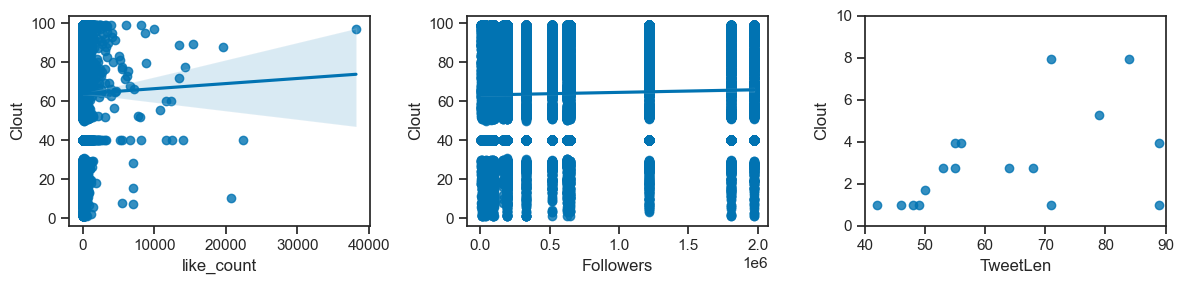

In [18]:
#laying out charts for have 3 graphs
f,axes=plt.subplots(1,3, figsize=(12,3))

sns.regplot(y = "Clout", x = "like_count", data = df, ax=axes[0])
sns.regplot(y = "Clout", x = "Followers", data = df, ax=axes[1])
sns.regplot(y = "Clout", x = "TweetLen", data = df, ax=axes[2])

axes[2].set_ylim(0,10); axes[2].set_xlim(40,90)
plt.tight_layout()

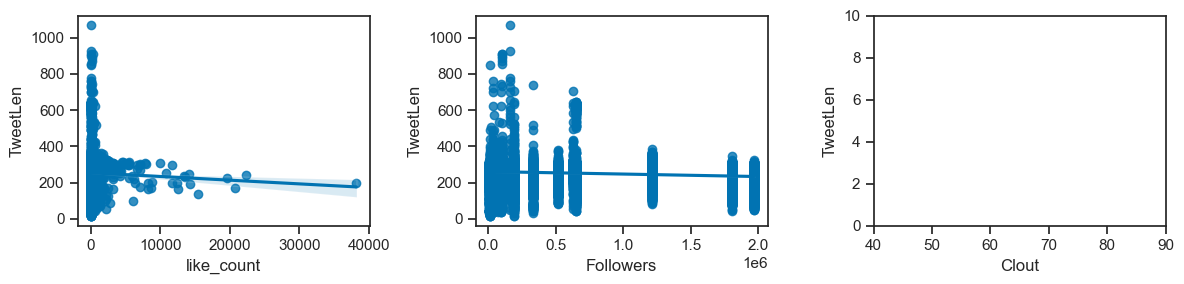

In [19]:
#laying out charts for have 3 graphs
f,axes=plt.subplots(1,3, figsize=(12,3))

sns.regplot(y = "TweetLen", x = "like_count", data = df, ax=axes[0])
sns.regplot(y = "TweetLen", x = "Followers", data = df, ax=axes[1])
sns.regplot(y = "TweetLen", x = "Clout", data = df, ax=axes[2])

axes[2].set_ylim(0,10); axes[2].set_xlim(40,90)
plt.tight_layout()

## Simulated Data ##

I will now simulate the data based on the above analysis using numpy.random. This allows me to generate synthetic data based on the above actual data. 



### Like Count ###

The below shows the analysis of the Like count variable. In order to simulate or sythesise data, we must understand the characterisitics of each variable.

In [20]:
df['like_count'].describe().round(2) # generate a description of the like count variable rounded to 2 decimal places


count    23006.00
mean       139.50
std        537.27
min          0.00
25%         27.00
50%         63.00
75%        137.00
max      38244.00
Name: like_count, dtype: float64

**Distribution**

The Below shows the distribution of the like count variable

c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


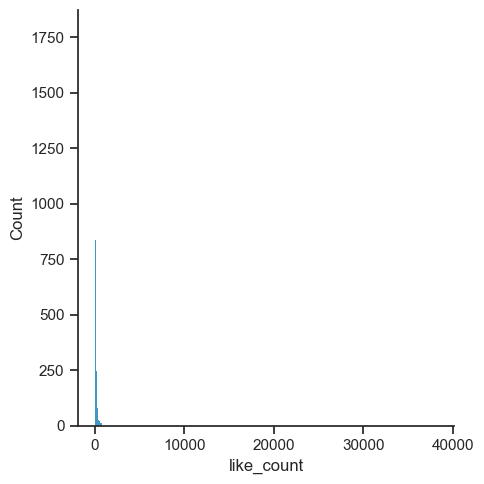

In [21]:
sns.displot(df['like_count'], label="Number of Likes") #Create a distribution plot of the like count variable based on the original data set

The above distribution plot cleary suggests that outliers exisit within the dataset, in order to further investigate the data, I generate a box plot of the information

<Axes: >

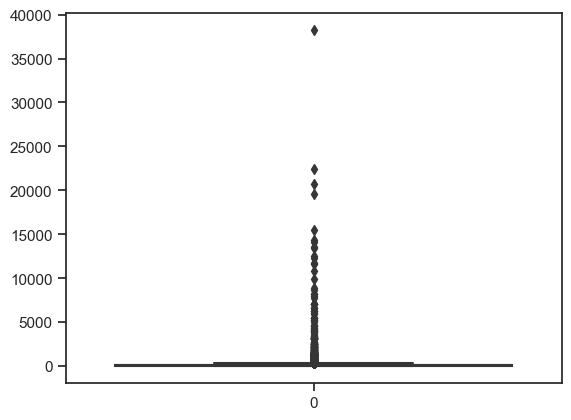

In [22]:
#generate box plot to illustrate outliers
sns.boxplot(df['like_count'])

The above box plot confirms there are a number of outliers. This combined with the distribution plot confrims that there are outliers within the data that are affecting the readibility of the data. In order to effectively simlate the data, we will need to remove the outliers and regenerate the above analysis.

### Z-Score Method to outlier removal ###

My objective here is to find the upper and lower limits, I have set this to be 3 standard deviations in both directions from the mean value.

In [23]:
upper_limit = df['like_count'].mean()+3*df['like_count'].std()
lower_limit = df['like_count'].mean()-3*df['like_count'].std()
print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)

Upper Limit: 1751.30638059676
Lower Limit: -1472.3037725814597


In [24]:
#next we want to locate the outliers and remove them from the dataset

df.loc[(df['like_count'] > upper_limit )| (df['like_count'] < lower_limit)]

,State,like_count,Clout,NewDay,Followers,TweetLen,Media
4322,HP,2346,40.06,0,37155,252,1
4441,J and K,1945,40.06,6,96691,101,0
4442,J and K,2772,40.06,2,96691,89,0
5446,Karnataka,2160,76.11,4,102662,297,0
6152,Kerala,1884,98.45,4,1972674,163,0
...,...,...,...,...,...,...,...
13893,Rajasthan,4997,83.39,1,190197,302,0
17994,Telangana,2089,40.06,6,10674,279,1
19561,UP,2210,40.06,4,517867,133,0
19962,UP,8144,99.00,6,517867,199,0


The above analysis identifies 110 outliers within the dataset. We will now remove these value by trimming the outliers from the dataframe and creating a new dataframe


c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


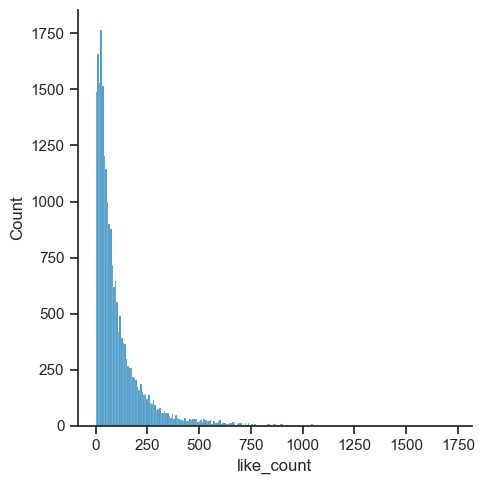

In [25]:
#we are now creating a new dataframe called df2 by trimming the original dataframe.
df2 = df.loc[(df['like_count'] < upper_limit ) & (df['like_count'] > lower_limit)]
#recreating the distribution chart excluding the outliers
sns.displot(df2['like_count'], label="Number of Likes")
#recreating the box plot, excluding the above outliers
#sns.boxplot(df2['like_count'])



The above distributuon shows an exponential distributions. The Numpy documentation describes typical phenomenon that assume a exponential distribution include *"the size of raindrops measured over many rainstorms [1], or the time between page requests to Wikipedia [2]"*

Further research confirms the assessment of the number likes be an exponential distribution with the common characteristics being a right skewed continious probability distributuin with variables with smaller values occur more frequently that variables with large values.

In [26]:
#Describe the amended dataset
df2['like_count'].describe().round(2)

count    22896.00
mean       114.42
std        159.80
min          0.00
25%         27.00
50%         63.00
75%        136.00
max       1731.00
Name: like_count, dtype: float64

c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


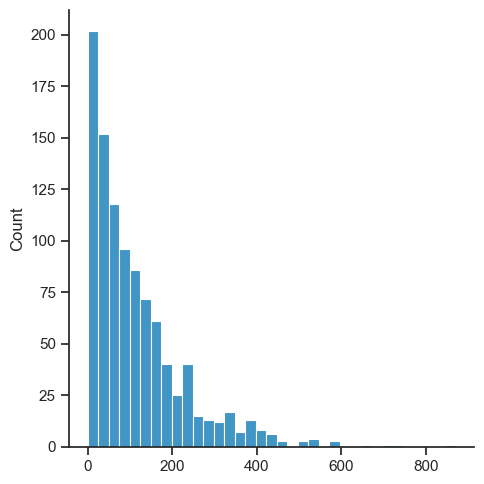

In [27]:
#Simulating the data using numpy based on the filtered like count assocuated with df2
sim_like = np.random.exponential(scale=df2['like_count'].mean(), size=1000)
sns.displot(sim_like, label="Simulated Number of Likes")


#reference to numpy library for exponential distribution: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.exponential.html#numpy.random.Generator.exponential

### Clout ###

The following section deals with the distribtution of Clout across the tweets included in the real world data. While this may not be representative of global tweet clout, it is consistent with the reset of the data included in this analysis. For the purpose of this project we will assume the sample data is representative of the global tweet clout distribution.

In [28]:
df2['Clout'].describe().round(2) # generate a description of the Followers variable rounded to 2 decimal places

count    22896.00
mean        63.82
std         25.41
min          1.00
25%         40.06
50%         65.16
75%         88.15
max         99.00
Name: Clout, dtype: float64

**Distribution**

The Below shows the distribution of the Clout variable

c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


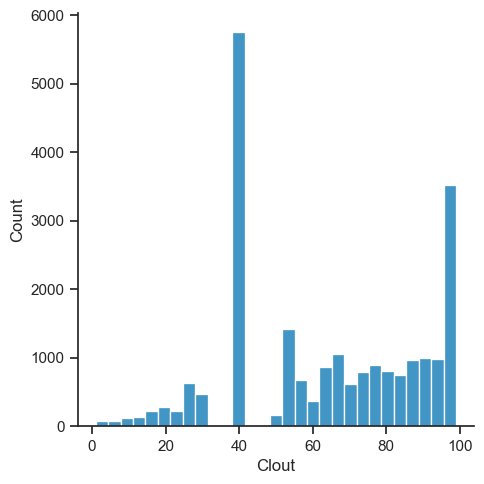

In [29]:
sns.displot(df2['Clout'], label="Clout ranking associated with each tweet") #Create a distribution plot of the clout variable based on the df2 data fram with like variable outliers removed

c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Clout', ylabel='Density'>

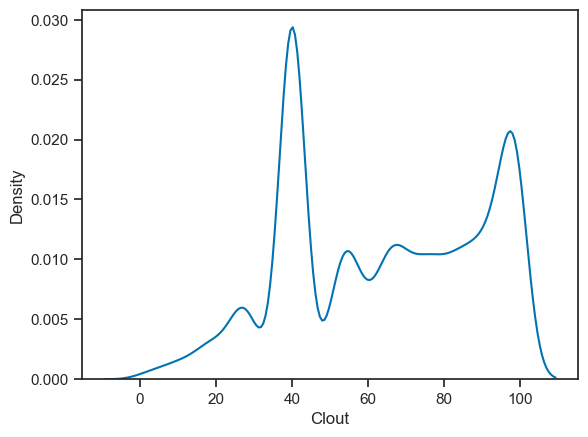

In [30]:
sns.kdeplot(df2['Clout'], label="Clout ranking associated with each tweet") 

I will now synthesize the data set using np.random.choice. This approach makes inferences about a datra series with reference to a sample data set. This approach is appropriate as the original data source is difficult to classify as a specific distribution. This is furhter compiled by the fact that the relationship between the variables in the data set is quite weak so it is not possible to draw comparisons between variables which would be an alterantive approach should a linear relationship exist.

C:\Users\mcase\AppData\Local\Temp\ipykernel_21096\1550047266.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(var, label="Real Data", shade=True)
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inste

<Axes: xlabel='Clout', ylabel='Density'>

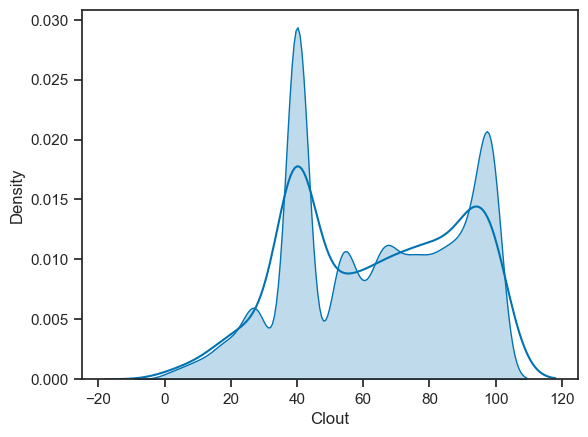

In [31]:
var = df2['Clout']
varSimMean = []

sns.kdeplot(var, label="Real Data", shade=True)

cloutsamp=np.random.choice(var, replace=True, size=1000)
sns.kdeplot(cloutsamp)

In [32]:
#I will now pull a description of the original real world data set

df2["Clout"].describe()

count    22896.000000
mean        63.823270
std         25.411376
min          1.000000
25%         40.060000
50%         65.160000
75%         88.150000
max         99.000000
Name: Clout, dtype: float64

In [33]:
#Now we will calculate the mean of the simulated data in order to validate that it is appropriate to use 

np.mean(cloutsamp)



63.28423

### Tweet Length ###

The following section deals with the distribtution of Tweet Length across the accounts included in the real world data. While this may not be representative of global tweet lenghts, it is consistent with the reset of the data included in this analysis. For the purpose of this project we will assume the sample data is representative of the global tweet length distribution.

Another factor to remain conscious is the limitation of tweet lenght enforced by twitter, each tweet is limited in terms of the number of characters available to the user in any one tweet. 

In [34]:
df2['TweetLen'].describe().round(2) # generate a description of the Tweet Lenght variable rounded to 2 decimal places

count    22896.00
mean       254.48
std         70.50
min         14.00
25%        215.00
50%        275.00
75%        302.00
max       1070.00
Name: TweetLen, dtype: float64

**Distribution**

The Below shows the distribution of the tweet length variable

c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


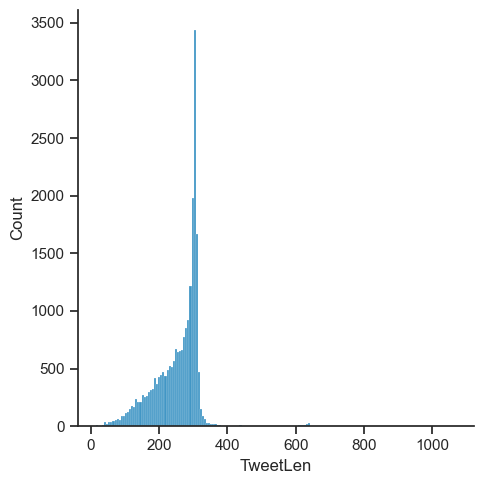

In [35]:
sns.displot(df2['TweetLen'], label="Tweet Length") #Create a distribution plot of the tweet lenght variable based on the df2 data fram with like variable outliers removed

<Axes: >

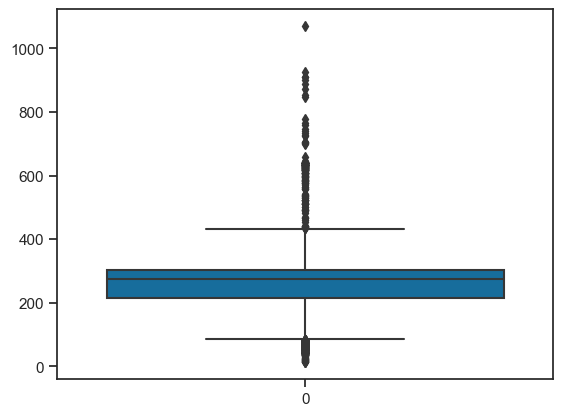

In [36]:
#generate box plot to illustrate outliers
sns.boxplot(df['TweetLen'])

Upper Limit: 465.9908139746168
Lower Limit: 42.968130819233664


c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


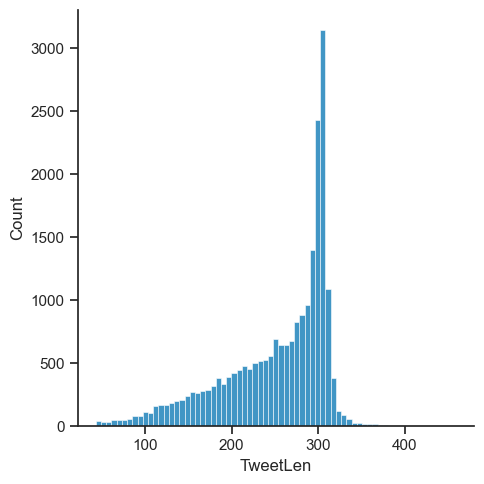

In [37]:
upper_limit = df2['TweetLen'].mean()+3*df2['TweetLen'].std()
lower_limit = df2['TweetLen'].mean()-3*df2['TweetLen'].std()
print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)
#we are now creating a new dataframe called df2 by trimming the original dataframe.
df3 = df2.loc[(df2['TweetLen'] < upper_limit ) & (df2['TweetLen'] > lower_limit)]
#recreating the distribution chart excluding the outliers
sns.displot(df3['TweetLen'], label="Length of Tweets")
#recreating the box plot, excluding the above outliers
#sns.boxplot(df3['TweetLen'])

c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


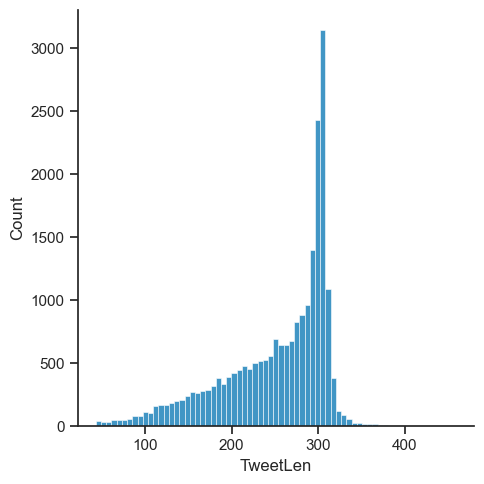

In [38]:
sns.displot(df3['TweetLen'], label="Tweet Length") #Create a distribution plot of the tweet lenght variable based on the df2 data fram with like variable outliers removed

c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='TweetLen', ylabel='Density'>

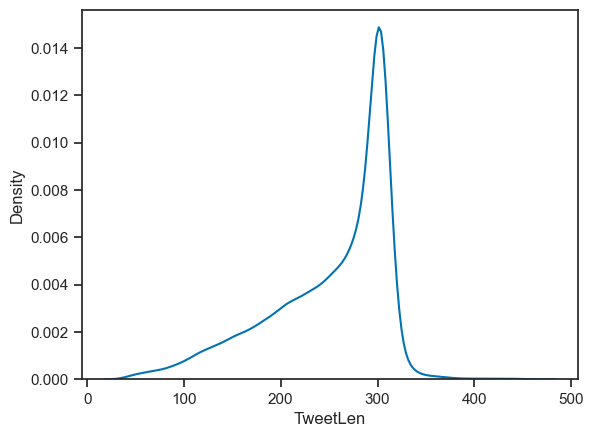

In [39]:
sns.kdeplot(df3['TweetLen'], label="Tweet Length excluding outliers") 

As with the clout variable, the distribtuon does not fit an easily idnetified distribution. The same approach of using np.random.choice has been adopted for the Tweet length variable

C:\Users\mcase\AppData\Local\Temp\ipykernel_21096\3783018913.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(var, label="Real Data", shade=True)
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inste

<Axes: xlabel='TweetLen', ylabel='Density'>

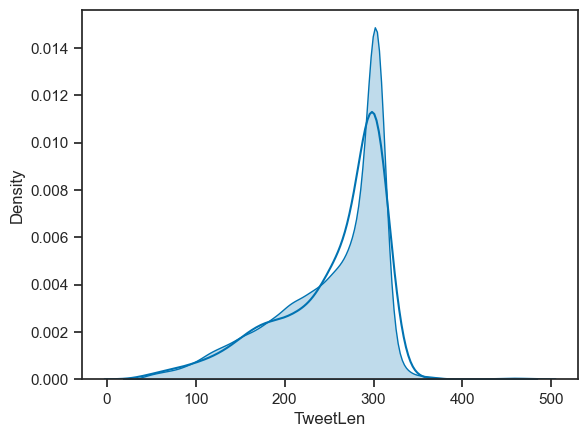

In [40]:
var = df3['TweetLen']
varSimMean = []

sns.kdeplot(var, label="Real Data", shade=True)

TweetLensamp=np.random.choice(var, replace=True, size=1000)
sns.kdeplot(TweetLensamp)

In [41]:
df3["TweetLen"].describe()


count    22681.000000
mean       252.048719
std         61.765004
min         43.000000
25%        215.000000
50%        274.000000
75%        301.000000
max        459.000000
Name: TweetLen, dtype: float64

In [42]:
np.mean(TweetLensamp)

253.77

### Day of Week ###

The following section deals with the disctribtuin of tweets across the days of the week. Day of the week is an important variable in regard to the total engagement a tweet receives. Inital analysis suggests that tweets are relatively evenly distributed across the week. 

In [43]:
df3['NewDay'].describe().round(2) # generate a description of the NewDay variable rounded to 2 decimal places

count     22681
unique        7
top           4
freq       3511
Name: NewDay, dtype: int64

**Distribution**

The Below shows the distribution of the NewDay variable

c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


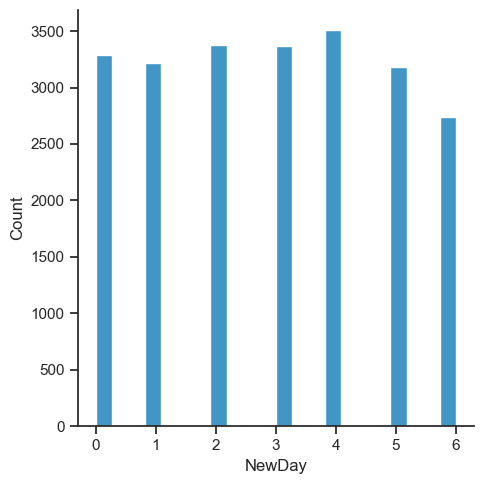

In [44]:
sns.displot(df3['NewDay'], label="Tweets per Day") #Create a distribution plot of the NewDay variable based on the df2 data fram with like variable outliers removed

<Axes: >

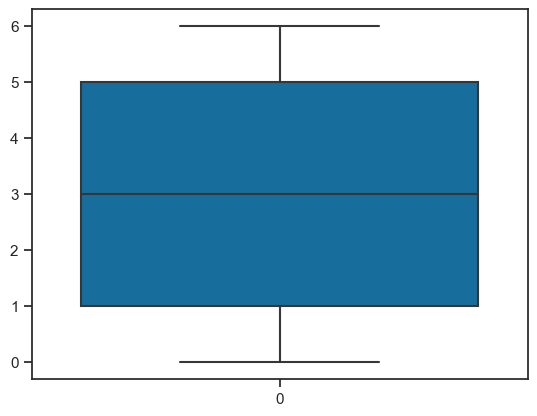

In [45]:
#generate box plot to illustrate outliers
sns.boxplot(df['NewDay'])

This data relates to the days of the week that tweets are published. On daily basis, the number of tweets are relatively even with little variation from Monday to Friday and a slight decrease on Saturday and Sunday. I would classify this distribtuin as uniform as per the below example:

![distribution](https://miro.medium.com/v2/resize:fit:950/1*9vPi9Vjo5LBRfYb0ZWJGaA.png)

c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mcase\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


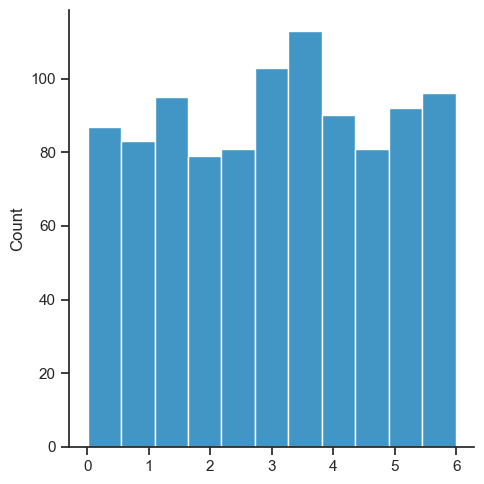

In [46]:
DaySim = np.random.uniform(df3['NewDay'].min(), df3['NewDay'].max(), 1000)
sns.displot(DaySim, label="Simulated Tweets per Day")

In [47]:
#Creating a Data Frame with the newly simulated data points

SimData = pd.DataFrame({"sim_Like" : sim_like, "sim_Clout" : cloutsamp, "Sim_TweetLen" : TweetLensamp, "Sim Day" : DaySim})
SimData.describe()

,sim_Like,sim_Clout,Sim_TweetLen,Sim Day
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,115.044554,63.284230,253.770000,3.047932
std,114.397713,25.323878,60.667699,1.713175
min,0.003925,1.000000,43.000000,0.004892
25%,31.602808,40.060000,221.000000,1.544577
50%,81.932827,64.670000,276.500000,3.115742
75%,157.681567,86.820000,301.000000,4.517573
max,870.197025,99.000000,459.000000,5.990002


In [48]:
df3.describe()

,like_count,Clout,Followers,TweetLen
count,22681.000000,22681.000000,2.268100e+04,22681.000000
mean,115.060623,63.567106,5.074136e+05,252.048719
std,160.187639,25.303947,5.978052e+05,61.765004
min,0.000000,1.000000,5.164000e+03,43.000000
25%,28.000000,40.060000,9.132500e+04,215.000000
50%,63.000000,64.670000,1.901970e+05,274.000000
75%,136.000000,87.480000,6.507710e+05,301.000000
max,1731.000000,99.000000,1.972674e+06,459.000000


***

## References ##

Mendley Data Set: https://data.mendeley.com/datasets/bfk3hvdcnt/1

Kaggle data set source: https://www.kaggle.com/datasets/jocelyndumlao/dmo-social-media-engagement-dataset

Determining factors that drive twitter engagement rates: https://journals.scholarpublishing.org/index.php/ABR/article/download/2700/1677#:~:text=These%20variables%20includes%20the%20day,the%20tweet%20among%20other%20variables.

Investigating Outliers: https://www.youtube.com/watch?v=Cw2IvmWRcXs

Statistics by Jom: https://statisticsbyjim.com/probability/exponential-distribution/

Identifying data distributions: https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9

***
# End #